1. Preberite datoteko wineReviews.csv in izpišite prve tri ocene vin.

In [81]:
import pandas as pd
df=pd.read_csv("wineReviews.csv", index_col=0, sep="\t")
df.head(3)

,country,description
wineId,,
219,Hungary,From a vineyard in Northern Tokaj this dry Fur...
271,Greece,"Lively aromas of lemon, grapefruit and melon s..."
308,Greece,This fuller-bodied white blend offers pineappl...


2. Izpišite iz katerih držav prihajajo ocenjena vina in koliko jih prihaja iz posamezne države.

In [82]:
df.groupby(["country"]).count()

,description
country,
Croatia,73
Greece,466
Hungary,146
Slovenia,87


3. Združite ocene vseh slovenskih vin v skupno besedilo

In [83]:
slovenska_vina = df[df["country"] == "Slovenia"]
zdruzen_text = "".join(slovenska_vina["description"].astype(str))

tokeniziraje in izpišite 8 tokenov, ki imajo najvišjo frekvenco pojavitve

In [84]:
from nltk.tokenize import word_tokenize
from nltk import FreqDist
import nltk

nltk.download()


seznam_tokeni = word_tokenize(zdruzen_text)
seznam_tokeni = [beseda.lower() for beseda in seznam_tokeni]

tokeni_freq = FreqDist(seznam_tokeni)
for beseda, pogostost in tokeni_freq.most_common(8):
    print("{w:<15}{f}".format(w=beseda, f=pogostost))

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml
,              232
and            224
of             184
the            125
.              107
with           101
a              93
is             62


izrišite graf, ki bo ponazoril, katerih 15 tokenov se največkrat pojavi v oceni slovenskih vin

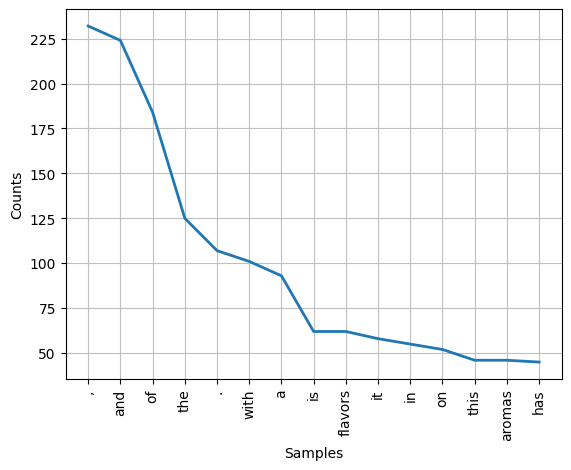

<Axes: xlabel='Samples', ylabel='Counts'>

In [85]:
tokeni_freq.plot(15, cumulative=False)

iz besedila odstranite vse "stop words" (besede brez pomena in ločila) ter izmed preostalih tokenov izpišite 5 takšnih, ki imajo najvišjo frekvenco pojavitve

In [86]:
from nltk.corpus import stopwords
import string

stop_list = stopwords.words('english') + list(string.punctuation)

tokeni_brez_stop = [token for token in seznam_tokeni if token not in stop_list]

tokeni_frekvenca_brez_stop = FreqDist(tokeni_brez_stop)

for word, freq in tokeni_frekvenca_brez_stop.most_common(5): 
    print("{w:<15}{f}".format(w=word, f=freq))

flavors        62
aromas         46
wine           43
apple          34
's             31


iz tako prečiščenega besedila izpišite 5 najpogostejših bigramov

In [87]:
from nltk import ngrams

dvojcki = FreqDist(ngrams(tokeni_brez_stop, 2))
for phrase, freq in dvojcki.most_common(5):
    print("{w:<30}{f}".format(w=str(phrase), f=freq))

('ribolla', 'gialla')         11
('green', 'apple')            10
('white', 'peach')            8
('black', 'cherry')           8
('red', 'raspberry')          7


 in trigramov

In [88]:
trojcki = FreqDist(ngrams(tokeni_brez_stop, 3))
for phrase, freq in trojcki.most_common(5):
    print("{w:<30}{f}".format(w=str(phrase), f=freq))

('ribolla', 'gialla', 'aromas')4
('freshly', 'cut', 'grass')   4
('cherry', 'red', 'raspberry')3
('tangerine', 'acidity', "'s")3
('freshly', 'mowed', 'grass') 3


4. V datafram-u ustvarite nov stolpec poimenovan processed, kamor shranite besedilo ocen (description)

In [89]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

def predprocesiraj(besedilo):
    # v celoti zapisano z malimi črkami
    mali_tokeni = besedilo.lower()
    tokeni = word_tokenize(mali_tokeni)
    # brez "stop words" (besede brez pomena in ločila)
    # besede morajo biti krnjene (nad njimi uporabite stemming)
    tokeni_brez_stop = [stemmer.stem(token) for token in tokeni if token not in stop_list]
    return ' '.join(tokeni_brez_stop)

df['processed'] = df['description'].apply(predprocesiraj)
df.head(5)

,country,description,processed
wineId,,,
219,Hungary,From a vineyard in Northern Tokaj this dry Fur...,vineyard northern tokaj dri furmint aroma citr...
271,Greece,"Lively aromas of lemon, grapefruit and melon s...",live aroma lemon grapefruit melon start white ...
308,Greece,This fuller-bodied white blend offers pineappl...,fuller-bodi white blend offer pineappl kiwi ci...
351,Hungary,This amber-colored Hungarian stunner has ether...,amber-color hungarian stunner ether aroma raw ...
377,Greece,"A fresh, tangy, vibrant wine that has ripe gre...",fresh tangi vibrant wine ripe green plum appl ...


5. S pomočjo TfidfVectorizer razdelite predprocesirana besedila ocen (iz stolpca processed) na unigrame in izpišite koliko je vseh nastalih tokenov (features).

In [90]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

vectorizer = TfidfVectorizer(ngram_range=(1,1), lowercase=True, stop_words=stop_list, preprocessor=predprocesiraj)
vhod = vectorizer.fit_transform(df['processed'])

print(len(vectorizer.get_feature_names_out()))

C:\Users\vzupanic\PycharmProjects\pythonProject\venv\lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['could', 'might', 'must', 'need', 'sha', 'wo', 'would'] not in stop_words.
  warnings.warn(


1705


6. Nad tako pripravljenimi podatki uporabite klasifikacijski algoritem Support Vector Classification, s katerim napoveste v katero državo sodi vino glede na besedilo podane ocene. Učna množica naj zajema 70% vseh podatkov, naključno stanje pa naj bo 789. Izpišite točnost klasifikacije.

In [91]:
x_train, x_test, y_train, y_test = train_test_split(vhod, df['country'], test_size=0.3, random_state=789)

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svc = SVC()

svc.fit(x_train, y_train)
enojcki_tocnost = accuracy_score(y_test, svc.predict(x_test))
print("Točnost:", enojcki_tocnost)

Točnost: 0.771551724137931


7. Enak postopek klasifikacije ponovite še nad bigrami

In [92]:
vectorizer = TfidfVectorizer(ngram_range=(1,2))
vhod = vectorizer.fit_transform(df['processed'])

x_train, x_test, y_train, y_test = train_test_split(vhod, df['country'], test_size=0.3, random_state=789)

svc.fit(x_train, y_train)
dvojcki_tocnost = accuracy_score(y_test, svc.predict(x_test))
print("Točnost:", dvojcki_tocnost)

Točnost: 0.6681034482758621


in trigrami.

In [93]:
vectorizer = TfidfVectorizer(ngram_range=(1,3))
vhod = vectorizer.fit_transform(df['processed'])

x_train, x_test, y_train, y_test = train_test_split(vhod, df['country'], test_size=0.3, random_state=789)

svc.fit(x_train, y_train)
trojcki_tocnost = accuracy_score(y_test, svc.predict(x_test))
print("Točnost:", trojcki_tocnost)

Točnost: 0.6379310344827587


 Primerjajte točnosti klasifikacije

In [94]:
print(f"Tocnost enojckov: {enojcki_tocnost}\n"
      f"Tocnost dvojckov: {dvojcki_tocnost}\n"
      f"Tocnost trojckov: {trojcki_tocnost}")

Tocnost enojckov: 0.771551724137931
Tocnost dvojckov: 0.6681034482758621
Tocnost trojckov: 0.6379310344827587


Najbolj tocni so bili enojcki. 

8. Za konec vzemite še neprečiščeno besedilo ocen iz stolpca description. Predprocesirajte ga z uporabo TfidfVectorizer in ga razdelite na unigrame. Nad njim izvedite klasifikacijo z enakim algoritmom, enako delitvijo učnih/testih podatkov, in enakim izhodnim razredom kot v prejšnjih točkah. Točnost klasifikacije primerjajte s tisto iz 6. točke.

In [95]:
vectorizer = TfidfVectorizer(ngram_range=(1,1))
vhod = vectorizer.fit_transform(df['description'])
x_train, x_test, y_train, y_test = train_test_split(vhod, df['country'], test_size=0.3, random_state=789)

svc.fit(x_train, y_train)
description_tocnost = accuracy_score(y_test, svc.predict(x_test))
print("Točnost:", description_tocnost)

Točnost: 0.7629310344827587


Tocnost je slabsa za malo manj kot procent. 